In [1]:
# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    #print (f"TRIAN Y\n {trainY}, \n\n\nTEST Y\n{testY}")
    
    # print(len(trainX))
    # print(len(trainY))

    # print(len(testX))
    # print(len(testY))

    # reshape dataset to have a single color channel
    # trainX.shape is 60000,28,28
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    # trainX.shape is 60000,28,28,1
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    # one hot encode target values
    trainY = to_categorical(trainY)

    # for x in trainY[1]:
    #     print (x)
    testY = to_categorical(testY)
    # print (f"TRAIN X{trainX},\n\n\nTRIAN Y {trainY}, \n\n\nTEST X{testX}, \n\n\nTEST Y{testY}")
    return trainX, trainY, testX, testY

Using TensorFlow backend.


In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [4]:
# define cnn model
def define_model():
    model = Sequential()
    #32 filters, each 3x3
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    #print(model)
    #2x2 max pooling layer
    model.add(MaxPooling2D((2, 2)))
    #flatten the pools
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    #print(type(model))
    return model


In [5]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    print(len(dataX))
    print(dataX[0][0][0])
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
		# select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [6]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [7]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

60000
[0.]

<class 'keras.engine.sequential.Sequential'>

> 98.583
<class 'keras.engine.sequential.Sequential'>
> 98.783
<class 'keras.engine.sequential.Sequential'>
> 98.625
<class 'keras.engine.sequential.Sequential'>
> 98.850
<class 'keras.engine.sequential.Sequential'>
> 98.733
[0.9858333468437195, 0.9878333210945129, 0.9862499833106995, 0.9884999990463257, 0.987333357334137] [<keras.callbacks.callbacks.History object at 0x0000021DA21F0948>, <keras.callbacks.callbacks.History object at 0x0000021DA29327C8>, <keras.callbacks.callbacks.History object at 0x0000021DA2F40648>, <keras.callbacks.callbacks.History object at 0x0000021DA447B808>, <keras.callbacks.callbacks.History object at 0x0000021DA75C8E88>]


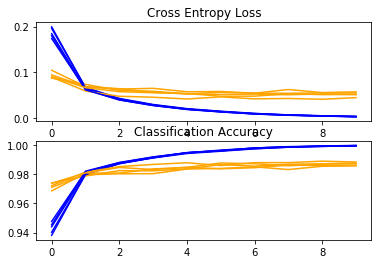

Accuracy: mean=98.715 std=0.099, n=5


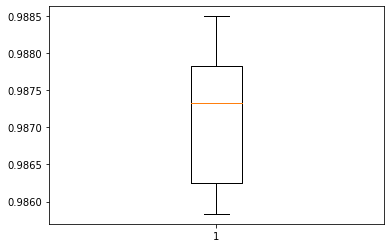

In [8]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX,testX)
scores, histories = evaluate_model(trainX,trainY)
print (scores, histories)
summarize_diagnostics(histories)
summarize_performance(scores)